In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import nltk, random, string, re
from nltk.corpus import inaugural
from wordcloud import WordCloud,STOPWORDS

In [2]:
df = pd.read_excel("Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [3]:
dictionary = pd.read_excel("Election_Data.xlsx", sheet_name="Sheet1")

In [4]:
dictionary['**Data Dictionary**']

0        1. vote: Party choice: Conservative or Labour
1                                     2. age: in years
2    3. economic.cond.national: Assessment of curre...
3    4. economic.cond.household: Assessment of curr...
4    5. Blair: Assessment of the Labour leader, 1 t...
5    6. Hague: Assessment of the Conservative leade...
6    7. Europe: an 11-point scale that measures res...
7    8. political.knowledge: Knowledge of parties' ...
8                           9. gender: female or male.
Name: **Data Dictionary**, dtype: object

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [7]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
df.shape

(1525, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
# Checking for all values - 0 in columns

for i in df.columns:
    print("Column Name:", i, "-", (df[i] == 0).sum())

Column Name: vote - 0
Column Name: age - 0
Column Name: economic.cond.national - 0
Column Name: economic.cond.household - 0
Column Name: Blair - 0
Column Name: Hague - 0
Column Name: Europe - 0
Column Name: political.knowledge - 455
Column Name: gender - 0


In [13]:
df.duplicated().sum()

8

In [14]:
df[df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [15]:
df.drop_duplicates(inplace = True)

In [16]:
# checking
df.duplicated().sum()

0

Distribution of age column
----------------------------------------------------------------------------


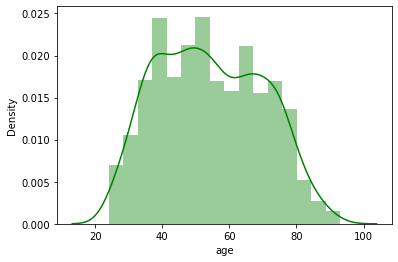

BoxPlot of age column
----------------------------------------------------------------------------


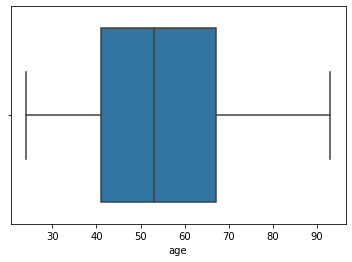

In [17]:
plt.figure()
print("Distribution of age column")
print("----------------------------------------------------------------------------")
sns.distplot(df['age'], kde=True, color='g');
plt.show()
    
plt.figure()
print("BoxPlot of age column")
print("----------------------------------------------------------------------------")
ax = sns.boxplot(x=df['age'])
plt.show()  

In [18]:
cat_columns = ['economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64
---------------------------------------------


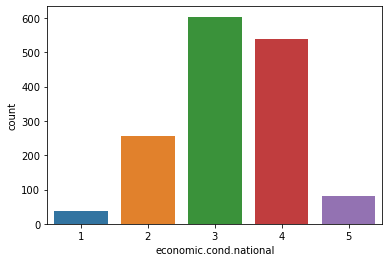

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64
---------------------------------------------


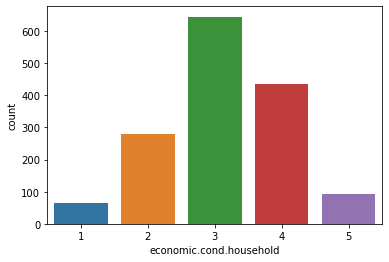

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64
---------------------------------------------


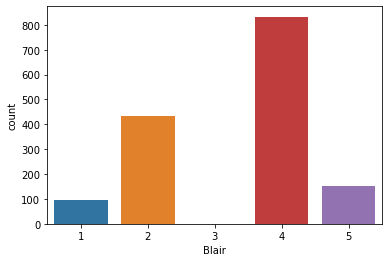

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64
---------------------------------------------


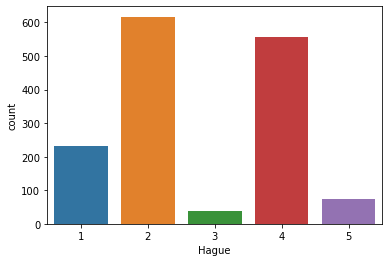

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64
---------------------------------------------


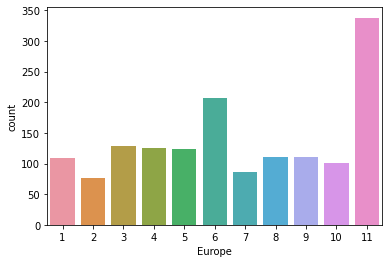

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64
---------------------------------------------


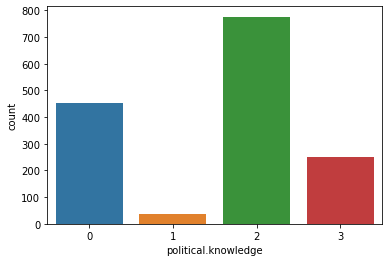

In [19]:
for i in cat_columns:
    print(df[i].value_counts())
    print('---------------------------------------------')
    sns.countplot(x = i, data = df) 
    plt.show()

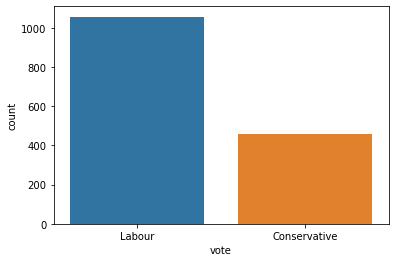

In [20]:
sns.countplot(x = df['vote'], data = df) 
plt.show()

In [21]:
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [22]:
# Target variable not balanced
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [23]:
df['vote'].value_counts(1)*100

Labour          69.676994
Conservative    30.323006
Name: vote, dtype: float64

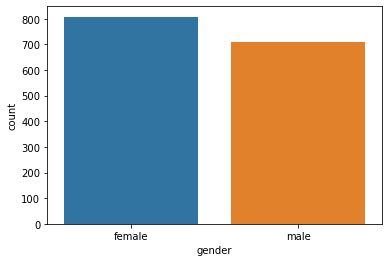

In [24]:
sns.countplot(x = df['gender'], data = df) 
plt.show()

In [25]:
df['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

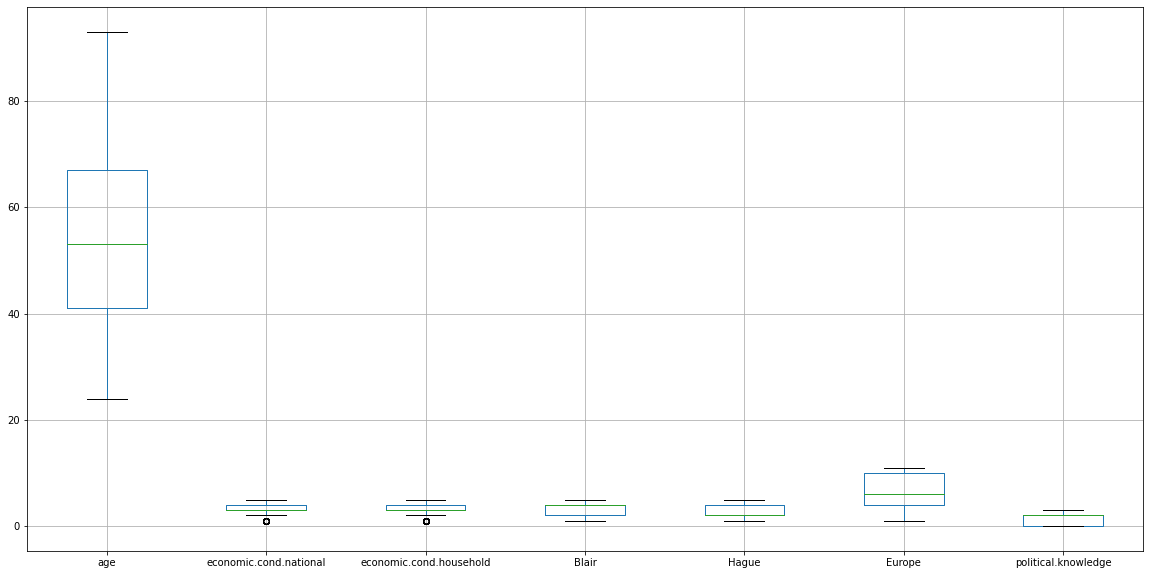

In [26]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

In [27]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [28]:
# Bivariant analysis

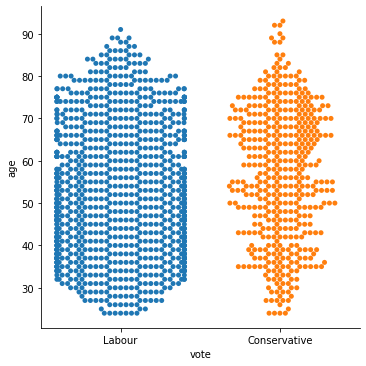

In [29]:
sns.catplot(x = 'vote', y = 'age', data = df, kind = 'swarm')

In [30]:
d2 = pd.crosstab(df["vote"], df["economic.cond.national"],margins=True)
d2

economic.cond.national,1,2,3,4,5,All
vote,,,,,,
Conservative,21,140,199,91,9,460
Labour,16,116,405,447,73,1057
All,37,256,604,538,82,1517


In [31]:
d3 = pd.crosstab(df["vote"], df["economic.cond.household"],margins=True)
d3

economic.cond.household,1,2,3,4,5,All
vote,,,,,,
Conservative,28,126,197,86,23,460
Labour,37,154,448,349,69,1057
All,65,280,645,435,92,1517


In [32]:
d4 = pd.crosstab(df["vote"], df["Blair"],margins=True)
d4

Blair,1,2,3,4,5,All
vote,,,,,,
Conservative,59,240,1,157,3,460
Labour,38,194,0,676,149,1057
All,97,434,1,833,152,1517


In [33]:
d5 = pd.crosstab(df["vote"], df["Hague"],margins=True)
d5

Hague,1,2,3,4,5,All
vote,,,,,,
Conservative,11,95,9,286,59,460
Labour,222,522,28,271,14,1057
All,233,617,37,557,73,1517


In [34]:
d6 = pd.crosstab(df["vote"], df["Europe"],margins=True)
d6

Europe,1,2,3,4,5,6,7,8,9,10,11,All
vote,,,,,,,,,,,,
Conservative,5,6,14,18,20,35,32,48,56,54,172,460
Labour,104,71,114,108,103,172,54,63,55,47,166,1057
All,109,77,128,126,123,207,86,111,111,101,338,1517


In [35]:
d7 = pd.crosstab(df["vote"], df["political.knowledge"],margins=True)
d7

political.knowledge,0,1,2,3,All
vote,,,,,
Conservative,94,11,283,72,460
Labour,360,27,493,177,1057
All,454,38,776,249,1517


In [36]:
d8 = pd.crosstab(df["vote"], df["gender"],margins=True)
d8

gender,female,male,All
vote,,,
Conservative,257,203,460
Labour,551,506,1057
All,808,709,1517


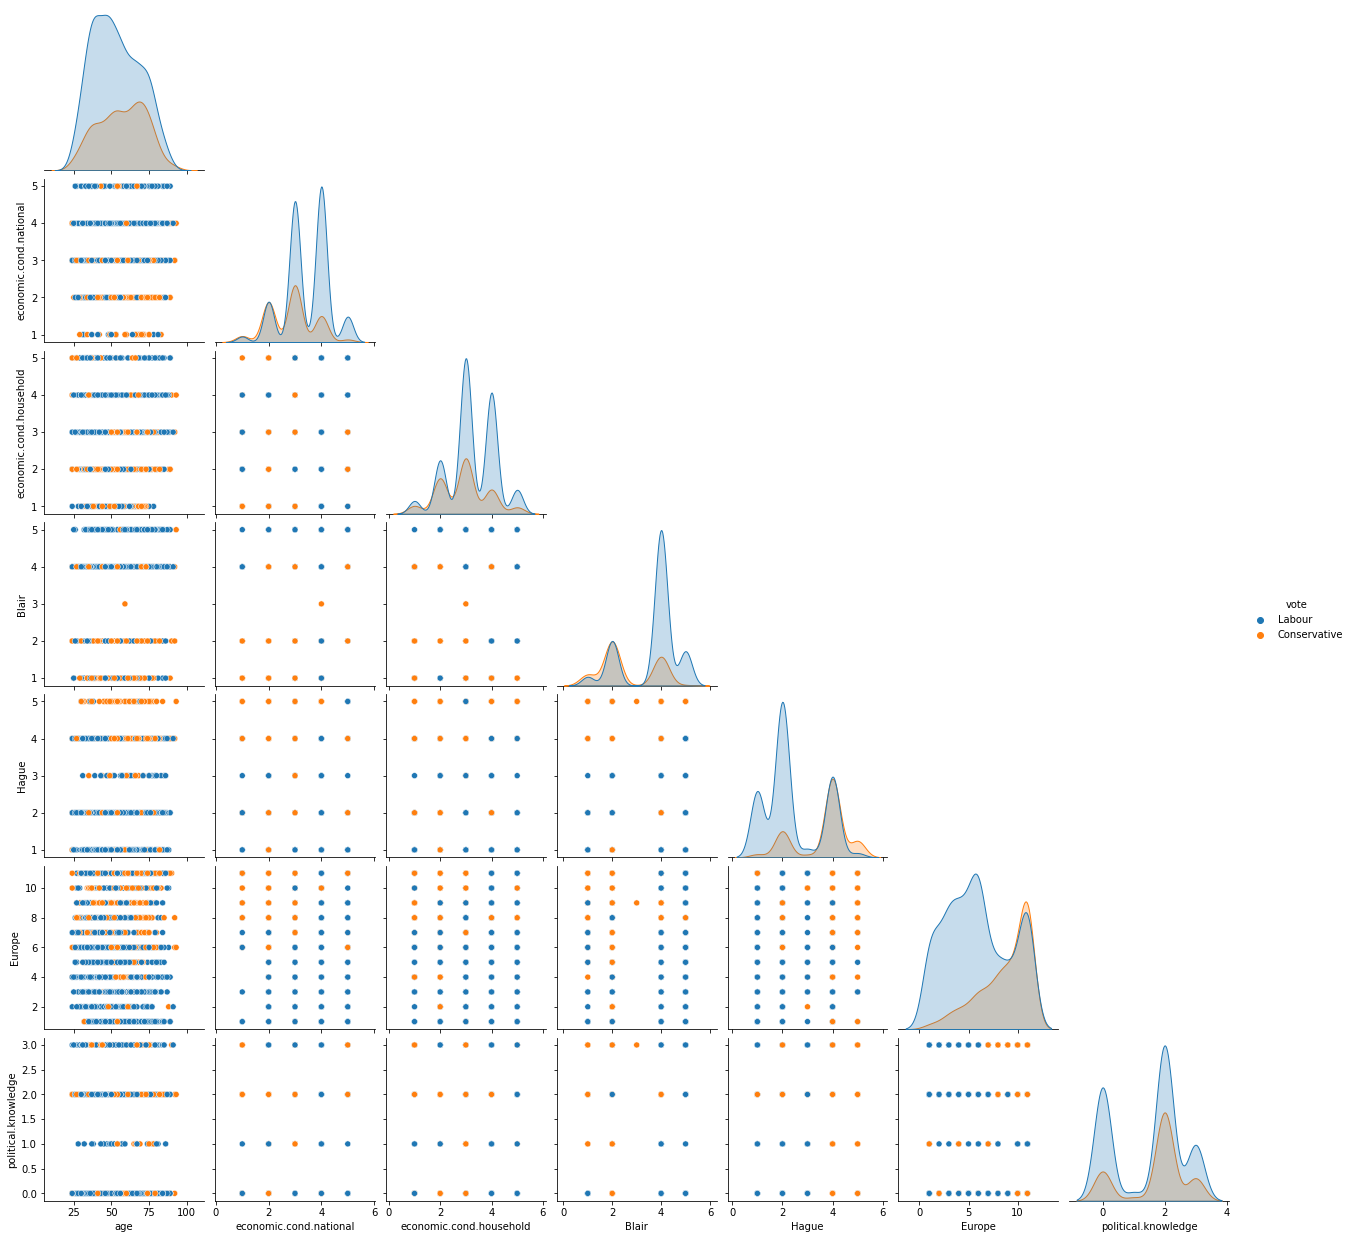

In [37]:
sns.pairplot(df, diag_kind = 'kde', corner = True, hue = 'vote')

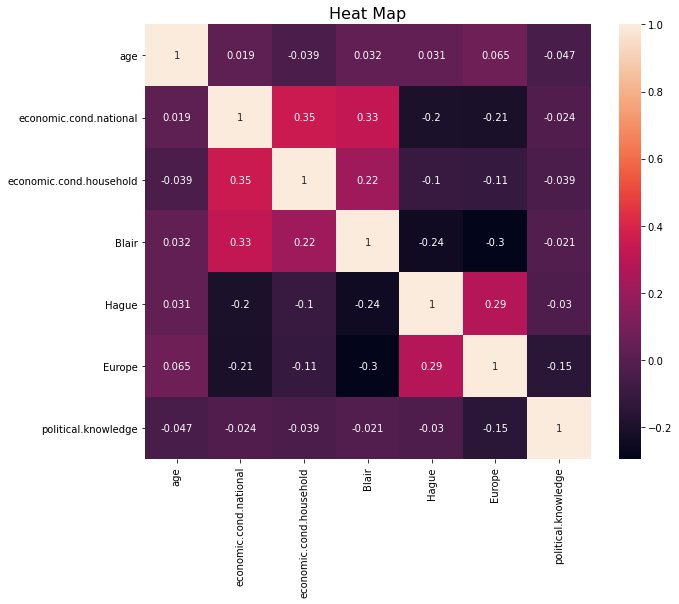

In [38]:
# Bi variant analysis

plt.figure(figsize = (10,8))
plt.title('Heat Map', fontsize = 16)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
df['gender'] = np.where(df['gender'] == 'male', 0, 1)  

In [40]:
df['gender'].value_counts()

1    808
0    709
Name: gender, dtype: int64

In [41]:
df['vote'] = np.where(df['vote'] == 'Labour', 0, 1)  

In [42]:
df['vote'].value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [43]:
# After label encoding 

df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,0
2,0,35,4,4,5,2,3,2,0
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int32
dtypes: int32(2), int64(7)
memory usage: 146.7 KB


In [45]:
# Used in KNN model
df2 = df.copy()

In [46]:
x = df.drop('vote', axis=1)
y = df.pop('vote')

In [47]:
# y variable - class imbalanced
y.value_counts(1)*100

0    69.676994
1    30.323006
Name: vote, dtype: float64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [49]:
x_train.shape

(1061, 8)

In [50]:
x_test.shape

(456, 8)

In [51]:
# Logistic regression

In [52]:
grid_lr = {'penalty': ['l1', 'l2', 'none'],
        'solver': ['sag', 'lbfgs', 'liblinear'],
        'tol': [0.0001, 0.00001]}

In [53]:
logr = LogisticRegression(max_iter=100000,n_jobs=2, random_state=1)

In [54]:
grid_search_logr = GridSearchCV(estimator = logr, param_grid = grid_lr, cv = 10, n_jobs = 2, scoring = 'accuracy')

In [55]:
grid_search_logr.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, n_jobs=2,
                                          random_state=1),
             n_jobs=2,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [56]:
final_lr = grid_search_logr.best_estimator_
final_lr

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')

In [57]:
# For Training

final_lr.fit(x_train, y_train)

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')

In [62]:
intercept = final_lr.intercept_[0]
print("The intercept for the model is{}".format(intercept))
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, final_lr.coef_[0][idx]))

The intercept for the model is-1.840138043920511
The coefficient for age is 0.013271015512599137
The coefficient for economic.cond.national is -0.6533293734713137
The coefficient for economic.cond.household is -0.07530819015596574
The coefficient for Blair is -0.6127410039232611
The coefficient for Hague is 0.8035063959216324
The coefficient for Europe is 0.20465447528494551
The coefficient for political.knowledge is 0.30027129240613004
The coefficient for gender is 0.1404633184044687


In [312]:
y_train_pred_lr = final_lr.predict(x_train)

Accuracy for Logistic Regression model for train data is: 0.8350612629594723


Classification report for Logistic Regression model for train data is: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       754
           1       0.76      0.64      0.69       307

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



Confusion Matrix for Logistic Regression model for train data is:


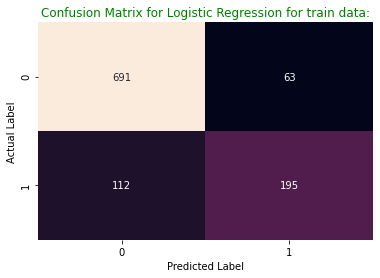

In [313]:
print('Accuracy for {} model for train data is:'.format('Logistic Regression'),final_lr.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format('Logistic Regression'),'\n',classification_report(y_train,y_train_pred_lr))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('Logistic Regression'))
sns.heatmap(confusion_matrix(y_train,y_train_pred_lr),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('Logistic Regression'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [314]:
# For Test Set

final_lr.fit(x_test, y_test)

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')

In [315]:
y_test_pred_lr = final_lr.predict(x_test)

Accuracy for Logistic Regression model for test data is: 0.8530701754385965


Classification report for Logistic Regression model for test data is: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       303
           1       0.81      0.74      0.77       153

    accuracy                           0.85       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.85      0.85       456



Confusion Matrix for Logistic Regression model for test data is:


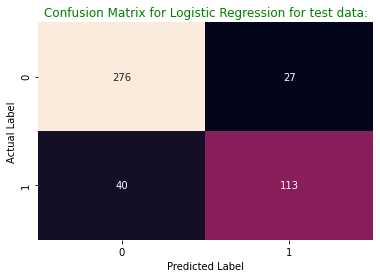

In [316]:
print('Accuracy for {} model for test data is:'.format('Logistic Regression'),final_lr.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format('Logistic Regression'),'\n',classification_report(y_test,y_test_pred_lr))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('Logistic Regression'))
sns.heatmap(confusion_matrix(y_test,y_test_pred_lr),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('Logistic Regression'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [317]:
y_train_prob_lr = final_lr.predict_proba(x_train)[:,1]
y_test_prob_lr = final_lr.predict_proba(x_test)[:,1]

In [318]:
auc_train_lr = roc_auc_score(y_train,y_train_prob_lr)
auc_test_lr = roc_auc_score(y_test,y_test_prob_lr)
print('AUC Score for train data is:',round(auc_train_lr,2))
print('AUC Score for test data is :',round(auc_test_lr,2))

AUC Score for train data is: 0.88
AUC Score for test data is : 0.9


In [319]:
fpr_lr_train, tpr_lr_train, thresholds_lr_train = roc_curve(y_train,y_train_prob_lr)
fpr_lr_test, tpr_lr_test, thresholds_lr_test = roc_curve(y_test,y_test_prob_lr)

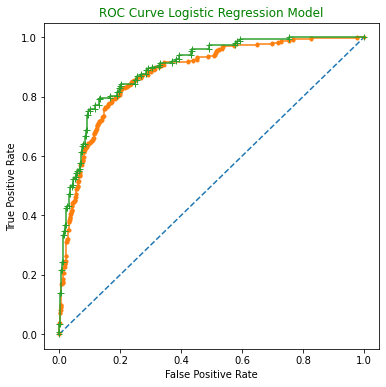

In [320]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_lr_train, tpr_lr_train, marker = '.');
plt.plot(fpr_lr_test, tpr_lr_test, marker = '+');
plt.title('ROC Curve Logistic Regression Model', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [321]:
# Linear Discriminant Analysis

In [322]:
grid_lda = {'solver': ['svd', 'lsqr', 'eigen'],
            'tol': [0.00010, 0.0010, 0.010, 0.10]}

In [323]:
lda = LinearDiscriminantAnalysis()

In [324]:
grid_search_lda = GridSearchCV(estimator = lda, param_grid = grid_lda, cv = 10, n_jobs = 2, scoring = 'accuracy')

In [325]:
grid_search_lda.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=2,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [326]:
final_lda = grid_search_lda.best_estimator_
final_lda

LinearDiscriminantAnalysis()

In [327]:
# For training set

final_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [328]:
y_train_pred_lda = final_lda.predict(x_train)

Accuracy for Linear Discriminant Analysis model for train data is: 0.8341187558906692


Classification report for Linear Discriminant Analysis model for train data is: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Confusion Matrix for Linear Discriminant Analysis model for train data is:


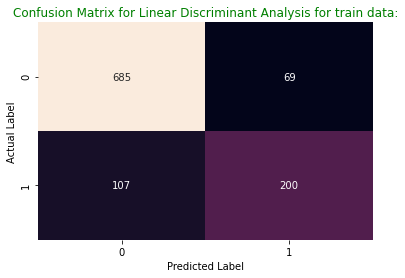

In [329]:
print('Accuracy for {} model for train data is:'.format('Linear Discriminant Analysis'),final_lda.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format('Linear Discriminant Analysis'),'\n',classification_report(y_train,y_train_pred_lda))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('Linear Discriminant Analysis'))
sns.heatmap(confusion_matrix(y_train,y_train_pred_lda),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('Linear Discriminant Analysis'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [330]:
# For testing set

final_lda.fit(x_test, y_test)

LinearDiscriminantAnalysis()

In [331]:
y_test_pred_lda = final_lda.predict(x_test)

Accuracy for Linear Discriminant Analysis model for test data is: 0.8442982456140351


Classification report for Linear Discriminant Analysis model for test data is: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       303
           1       0.77      0.76      0.77       153

    accuracy                           0.84       456
   macro avg       0.83      0.82      0.82       456
weighted avg       0.84      0.84      0.84       456



Confusion Matrix for Linear Discriminant Analysis model for test data is:


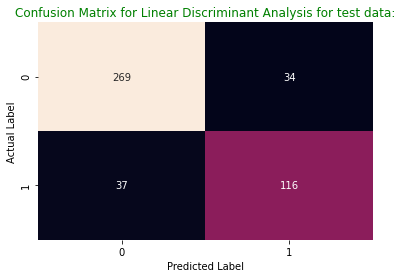

In [332]:
print('Accuracy for {} model for test data is:'.format('Linear Discriminant Analysis'),final_lda.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format('Linear Discriminant Analysis'),'\n',classification_report(y_test,y_test_pred_lda))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('Linear Discriminant Analysis'))
sns.heatmap(confusion_matrix(y_test,y_test_pred_lda),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('Linear Discriminant Analysis'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [333]:
y_train_lda_prob = final_lda.predict_proba(x_train)[:,1]
y_test_lda_prob = final_lda.predict_proba(x_test)[:,1]

In [334]:
auc_train_lda = roc_auc_score(y_train,y_train_lda_prob)
auc_test_lda = roc_auc_score(y_test,y_test_lda_prob)
print('AUC Score for train data is:',round(auc_train_lda,2))
print('AUC Score for test data is :',round(auc_test_lda,2))

AUC Score for train data is: 0.88
AUC Score for test data is : 0.9


In [335]:
fpr_lda_train, tpr_lda_train, thresholds_lda_train = roc_curve(y_train, y_train_lda_prob)
fpr_lda_test, tpr_lda_test, thresholds_lda_test = roc_curve(y_test, y_test_lda_prob)

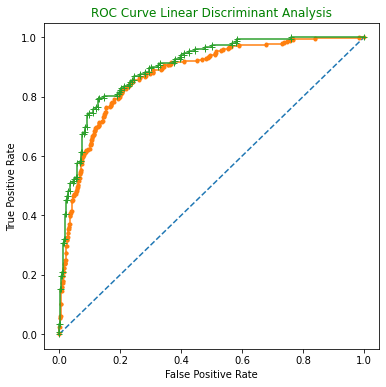

In [336]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_lda_train, tpr_lda_train, marker = '.');
plt.plot(fpr_lda_test, tpr_lda_test, marker = '+');
plt.title('ROC Curve Linear Discriminant Analysis', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [337]:
#  KNN Classifier 

In [338]:
x2 = df2.drop('vote', axis=1)
y2 = df2.pop('vote')

In [339]:
# scaling applied for KNN

x2 = x2.apply(zscore) 

In [340]:
x2.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,-1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,-1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,-1.067536


In [341]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30 , random_state=1)

In [342]:
# To find the best value of K

ac_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x2_train, y2_train)
    scores = knn.score(x2_test, y2_test)
    ac_scores.append(scores)

In [343]:
MCE = [1 - x for x in ac_scores]
MCE  

[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.18201754385964908,
 0.17763157894736847,
 0.17105263157894735,
 0.17763157894736847,
 0.17324561403508776,
 0.16666666666666663,
 0.16666666666666663]

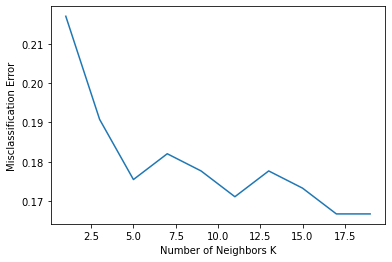

In [344]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [345]:
grid_knc = {'metric': ['euclidean', 'manhattan', 'minkowski'],
            'weights': ['uniform', 'distance']}

In [346]:
# k = 9 gives least misclassification error

knc1 = KNeighborsClassifier(n_neighbors = 9) 

In [347]:
grid_search_knc = GridSearchCV(estimator = knc1, param_grid = grid_knc, cv = 10, n_jobs = 2, scoring = 'accuracy')

In [348]:
grid_search_knc.fit(x2_train, y2_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=2,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [349]:
knc = grid_search_knc.best_estimator_
knc

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [350]:
# For Training Set

knc.fit(x2_train, y2_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [351]:
y_train_pred_knc = knc.predict(x2_train)

Accuracy for KNeighborClassifier model for train data is: 0.8482563619227145


Classification report for KNeighborClassifier model for train data is: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       754
           1       0.77      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.85      1061



Confusion Matrix for KNeighborClassifier model for train data is:


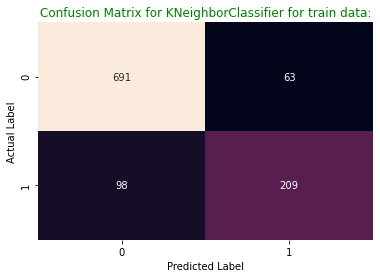

In [352]:
print('Accuracy for {} model for train data is:'.format('KNeighborClassifier'),knc.score(x2_train,y2_train))
print('\n')
print('Classification report for {} model for train data is:'.format('KNeighborClassifier'),'\n',classification_report(y2_train,y_train_pred_knc))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('KNeighborClassifier'))
sns.heatmap(confusion_matrix(y2_train,y_train_pred_knc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('KNeighborClassifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [353]:
# For testing set

knc.fit(x2_test, y2_test)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [354]:
y_test_pred_knc = knc.predict(x2_test)

Accuracy for KNeighborClassifier model for test data is: 0.8486842105263158


Classification report for KNeighborClassifier model for test data is: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       303
           1       0.81      0.72      0.76       153

    accuracy                           0.85       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.85      0.85       456



Confusion Matrix for KNeighborClassifier model for test data is:


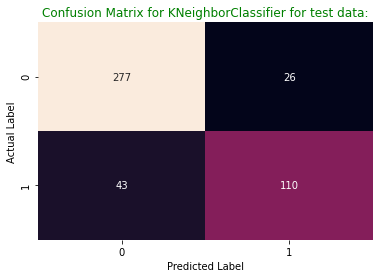

In [355]:
print('Accuracy for {} model for test data is:'.format('KNeighborClassifier'),knc.score(x2_test,y2_test))
print('\n')
print('Classification report for {} model for test data is:'.format('KNeighborClassifier'),'\n',classification_report(y2_test,y_test_pred_knc))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('KNeighborClassifier'))
sns.heatmap(confusion_matrix(y2_test,y_test_pred_knc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('KNeighborClassifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [356]:
y_train_knc_prob = knc.predict_proba(x2_train)[:,1]
y_test_knc_prob = knc.predict_proba(x2_test)[:,1]

In [357]:
auc_train_knc = roc_auc_score(y2_train,y_train_knc_prob)
auc_test_knc = roc_auc_score(y2_test,y_test_knc_prob)
print('AUC Score for train data is:',round(auc_train_knc,2))
print('AUC Score for test data is :',round(auc_test_knc,2))

AUC Score for train data is: 0.87
AUC Score for test data is : 0.92


In [358]:
fpr_knc_train, tpr_knc_train, thresholds_knc_train = roc_curve(y2_train, y_train_knc_prob)
fpr_knc_test, tpr_knc_test, thresholds_knc_test = roc_curve(y2_test, y_test_knc_prob)

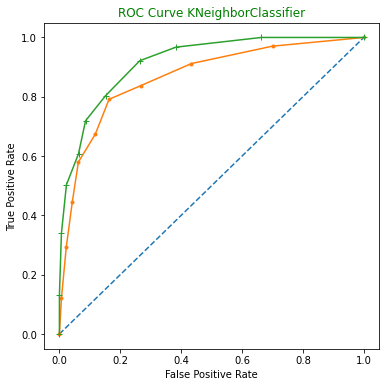

In [359]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_knc_train, tpr_knc_train, marker = '.');
plt.plot(fpr_knc_test, tpr_knc_test, marker = '+');
plt.title('ROC Curve KNeighborClassifier', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [106]:
# Gaussian Naive Bayes
# Huper parameter tuning is not required for GN Bayes model as there are no parameters to tune

In [107]:
gnb = GaussianNB()

In [108]:
# For Training Set

gnb.fit(x_train, y_train)

GaussianNB()

In [109]:
y_train_pred_gnb = gnb.predict(x_train)

Accuracy for Gaussian Naive Bayes model for train data is: 0.8350612629594723


Classification report for Gaussian Naive Bayes model for train data is: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Confusion Matrix for Gaussian Naive Bayes model for train data is:


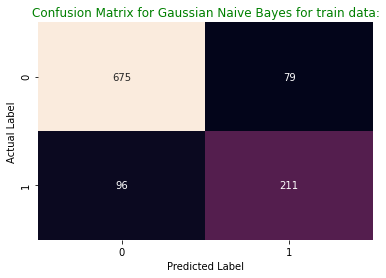

In [110]:
print('Accuracy for {} model for train data is:'.format('Gaussian Naive Bayes'),gnb.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format('Gaussian Naive Bayes'),'\n',classification_report(y_train,y_train_pred_gnb))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('Gaussian Naive Bayes'))
sns.heatmap(confusion_matrix(y_train,y_train_pred_gnb),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('Gaussian Naive Bayes'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [111]:
# For testing set

gnb.fit(x_test, y_test)

GaussianNB()

In [112]:
y_test_pred_gnb = gnb.predict(x_test)

Accuracy for Gaussian Naive Bayes model for test data is: 0.8267543859649122


Classification report for Gaussian Naive Bayes model for test data is: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.75      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



Confusion Matrix for Gaussian Naive Bayes model for test data is:


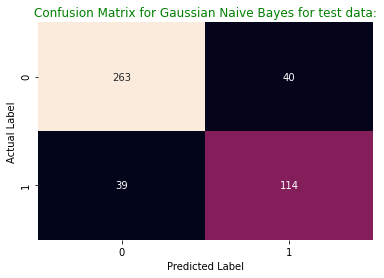

In [113]:
print('Accuracy for {} model for test data is:'.format('Gaussian Naive Bayes'),gnb.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format('Gaussian Naive Bayes'),'\n',classification_report(y_test,y_test_pred_gnb))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('Gaussian Naive Bayes'))
sns.heatmap(confusion_matrix(y_test,y_test_pred_gnb),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('Gaussian Naive Bayes'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [114]:
y_train_gnb_prob = gnb.predict_proba(x_train)[:,1]
y_test_gnb_prob = gnb.predict_proba(x_test)[:,1]

In [115]:
auc_train_gnb = roc_auc_score(y_train,y_train_gnb_prob)
auc_test_gnb = roc_auc_score(y_test,y_test_gnb_prob)
print('AUC Score for train data is:',round(auc_train_gnb,2))
print('AUC Score for test data is :',round(auc_test_gnb,2))

AUC Score for train data is: 0.89
AUC Score for test data is : 0.88


In [116]:
fpr_gnb_train, tpr_gnb_train, thresholds_gnb_train = roc_curve(y_train, y_train_gnb_prob)
fpr_gnb_test, tpr_gnb_test, thresholds_gnb_test = roc_curve(y_test, y_test_gnb_prob)

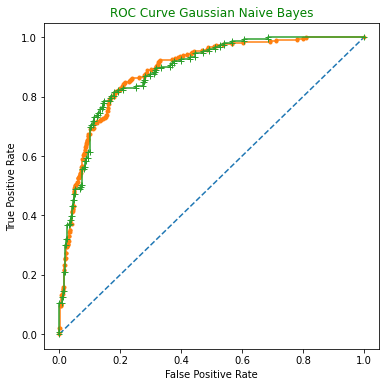

In [117]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_gnb_train, tpr_gnb_train, marker = '.');
plt.plot(fpr_gnb_test, tpr_gnb_test, marker = '+');
plt.title('ROC Curve Gaussian Naive Bayes', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [118]:
# Bagging

In [65]:
rfc1 = RandomForestClassifier(random_state=1)

In [66]:
grid_rfc = {'max_depth': [3,4,5],
            'max_features': [5,6,7],
            'min_samples_leaf': [25,30,35],
            'min_samples_split': [90,100,110],
            'n_estimators': [300,400,500]}

In [67]:
grid_search_rfc = GridSearchCV(estimator = rfc1, param_grid = grid_rfc, cv = 10, n_jobs = 2, scoring = 'accuracy')

In [68]:
grid_search_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=2,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [90, 100, 110],
                         'n_estimators': [300, 400, 500]},
             scoring='accuracy')

In [69]:
rfc = grid_search_rfc.best_estimator_
rfc

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=35,
                       min_samples_split=90, n_estimators=300, random_state=1)

In [70]:
y_train_pred_rfc = rfc.predict(x_train)

Accuracy for Random Forest Classifier model for train data is: 0.8341187558906692


Classification report for Random Forest Classifier model for train data is: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       754
           1       0.79      0.58      0.67       307

    accuracy                           0.83      1061
   macro avg       0.82      0.76      0.78      1061
weighted avg       0.83      0.83      0.83      1061



Confusion Matrix for Random Forest Classifier model for train data is:


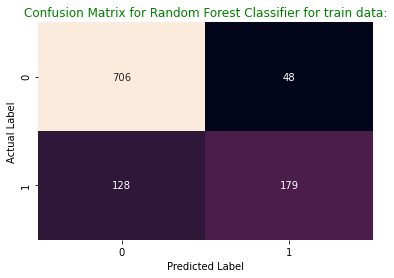

In [71]:
print('Accuracy for {} model for train data is:'.format('Random Forest Classifier'),rfc.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format('Random Forest Classifier'),'\n',classification_report(y_train,y_train_pred_rfc))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('Random Forest Classifier'))
sns.heatmap(confusion_matrix(y_train,y_train_pred_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('Random Forest Classifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [72]:
# For testing set

rfc.fit(x_test, y_test)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=35,
                       min_samples_split=90, n_estimators=300, random_state=1)

In [73]:
y_test_pred_rfc = rfc.predict(x_test)

Accuracy for Random Forest Classifier model for test data is: 0.831140350877193


Classification report for Random Forest Classifier model for test data is: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.80      0.67      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Confusion Matrix for Random Forest Classifier model for test data is:


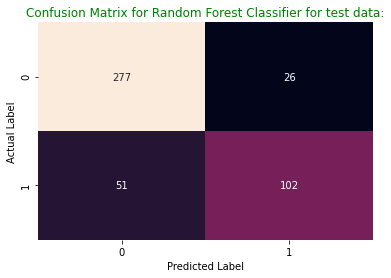

In [74]:
print('Accuracy for {} model for test data is:'.format('Random Forest Classifier'),rfc.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format('Random Forest Classifier'),'\n',classification_report(y_test,y_test_pred_rfc))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('Random Forest Classifier'))
sns.heatmap(confusion_matrix(y_test,y_test_pred_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('Random Forest Classifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [75]:
y_train_rfc_prob = rfc.predict_proba(x_train)[:,1]
y_test_rfc_prob = rfc.predict_proba(x_test)[:,1]

In [76]:
auc_train_rfc = roc_auc_score(y_train,y_train_rfc_prob)
auc_test_rfc = roc_auc_score(y_test,y_test_rfc_prob)
print('AUC Score for train data is:',round(auc_train_rfc,2))
print('AUC Score for test data is :',round(auc_test_rfc,2))

AUC Score for train data is: 0.87
AUC Score for test data is : 0.89


In [77]:
fpr_rfc_train, tpr_rfc_train, thresholds_rfc_train = roc_curve(y_train, y_train_rfc_prob)
fpr_rfc_test, tpr_rfc_test, thresholds_rfc_test = roc_curve(y_test, y_test_rfc_prob)

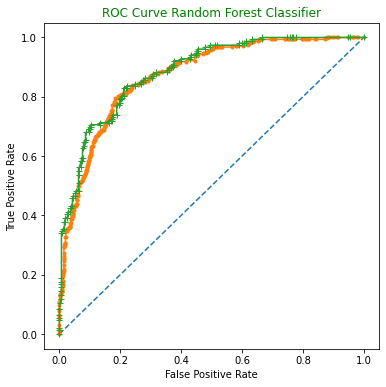

In [78]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_rfc_train, tpr_rfc_train, marker = '.');
plt.plot(fpr_rfc_test, tpr_rfc_test, marker = '+');
plt.title('ROC Curve Random Forest Classifier', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [79]:
# Boosting - AdaBoosting Classifier

In [96]:
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)

In [97]:
# For training set

abcl = abcl.fit(x_train, y_train) 

In [98]:
y_train_pred_abcl = abcl.predict(x_train)

Accuracy for AdaBoostClassifier model for train data is: 0.8463713477851084


Classification report for AdaBoostClassifier model for train data is: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       754
           1       0.76      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



Confusion Matrix for AdaBoostClassifier model for train data is:


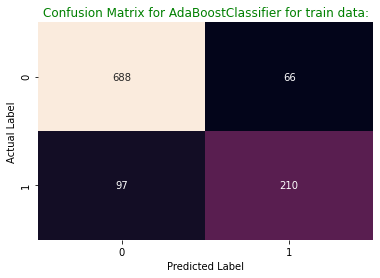

In [99]:
print('Accuracy for {} model for train data is:'.format('AdaBoostClassifier'),abcl.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format('AdaBoostClassifier'),'\n',classification_report(y_train,y_train_pred_abcl))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('AdaBoostClassifier'))
sns.heatmap(confusion_matrix(y_train,y_train_pred_abcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('AdaBoostClassifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [100]:
# For testing set

abcl.fit(x_test, y_test)

AdaBoostClassifier(random_state=1)

In [101]:
y_test_pred_abcl = abcl.predict(x_test) 

Accuracy for AdaBoostClassifier model for test data is: 0.8442982456140351


Classification report for AdaBoostClassifier model for test data is: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       303
           1       0.77      0.76      0.77       153

    accuracy                           0.84       456
   macro avg       0.83      0.82      0.83       456
weighted avg       0.84      0.84      0.84       456



Confusion Matrix for AdaBoostClassifier model for test data is:


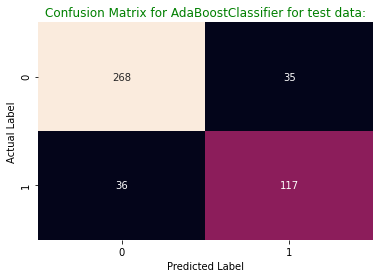

In [102]:
print('Accuracy for {} model for test data is:'.format('AdaBoostClassifier'),abcl.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format('AdaBoostClassifier'),'\n',classification_report(y_test,y_test_pred_abcl))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('AdaBoostClassifier'))
sns.heatmap(confusion_matrix(y_test,y_test_pred_abcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('AdaBoostClassifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [103]:
y_train_abcl_prob = abcl.predict_proba(x_train)[:,1]
y_test_abcl_prob = abcl.predict_proba(x_test)[:,1]

In [104]:
auc_train_abcl = roc_auc_score(y_train,y_train_abcl_prob)
auc_test_abcl = roc_auc_score(y_test,y_test_abcl_prob)
print('AUC Score for train data is:',round(auc_train_abcl,2))
print('AUC Score for test data is :',round(auc_test_abcl,2))

AUC Score for train data is: 0.86
AUC Score for test data is : 0.93


In [105]:
fpr_abcl_train, tpr_abcl_train, thresholds_abcl_train = roc_curve(y_train, y_train_abcl_prob)
fpr_abcl_test, tpr_abcl_test, thresholds_abcl_test = roc_curve(y_test, y_test_abcl_prob)

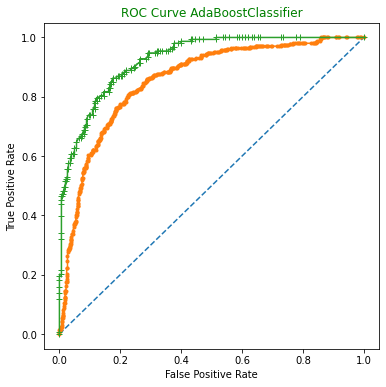

In [106]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_abcl_train, tpr_abcl_train, marker = '.');
plt.plot(fpr_abcl_test, tpr_abcl_test, marker = '+');
plt.title('ROC Curve AdaBoostClassifier', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [118]:
# Boosting - Gradient Boosting Classifier

In [150]:
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=1)

In [151]:
# For training set

gbcl = gbcl.fit(x_train, y_train) 

In [152]:
y_train_pred_gbcl = gbcl.predict(x_train)

Accuracy for GradientBoostClassifier model for train data is: 0.8925541941564562


Classification report for GradientBoostClassifier model for train data is: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



Confusion Matrix for GradientBoostClassifier model for train data is:


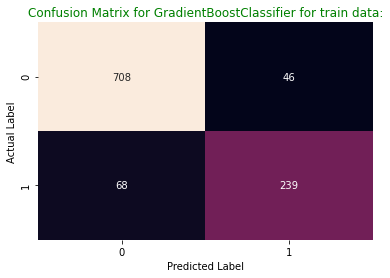

In [153]:
print('Accuracy for {} model for train data is:'.format('GradientBoostClassifier'),gbcl.score(x_train,y_train))
print('\n')
print('Classification report for {} model for train data is:'.format('GradientBoostClassifier'),'\n',classification_report(y_train,y_train_pred_gbcl))
print('\n')
print('Confusion Matrix for {} model for train data is:'.format('GradientBoostClassifier'))
sns.heatmap(confusion_matrix(y_train,y_train_pred_gbcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for train data:'.format('GradientBoostClassifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [154]:
# For testing set

gbcl.fit(x_test, y_test)

GradientBoostingClassifier(random_state=1)

In [155]:
y_test_pred_gbcl = gbcl.predict(x_test) 

Accuracy for GradientBoostClassifier model for test data is: 0.9276315789473685


Classification report for GradientBoostClassifier model for test data is: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       303
           1       0.92      0.86      0.89       153

    accuracy                           0.93       456
   macro avg       0.93      0.91      0.92       456
weighted avg       0.93      0.93      0.93       456



Confusion Matrix for GradientBoostClassifier model for test data is:


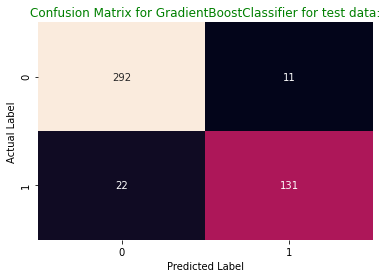

In [156]:
print('Accuracy for {} model for test data is:'.format('GradientBoostClassifier'),gbcl.score(x_test,y_test))
print('\n')
print('Classification report for {} model for test data is:'.format('GradientBoostClassifier'),'\n',classification_report(y_test,y_test_pred_gbcl))
print('\n')
print('Confusion Matrix for {} model for test data is:'.format('GradientBoostClassifier'))
sns.heatmap(confusion_matrix(y_test,y_test_pred_gbcl),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {} for test data:'.format('GradientBoostClassifier'), color = 'green')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [157]:
y_train_gbcl_prob = gbcl.predict_proba(x_train)[:,1]
y_test_gbcl_prob = gbcl.predict_proba(x_test)[:,1]

In [158]:
auc_train_gbcl = roc_auc_score(y_train,y_train_gbcl_prob)
auc_test_gbcl = roc_auc_score(y_test,y_test_gbcl_prob)
print('AUC Score for train data is:',round(auc_train_gbcl,2))
print('AUC Score for test data is :',round(auc_test_gbcl,2))

AUC Score for train data is: 0.89
AUC Score for test data is : 0.98


In [159]:
fpr_gbcl_train, tpr_gbcl_train, thresholds_gbcl_train = roc_curve(y_train, y_train_gbcl_prob)
fpr_gbcl_test, tpr_gbcl_test, thresholds_gbcl_test = roc_curve(y_test, y_test_gbcl_prob)

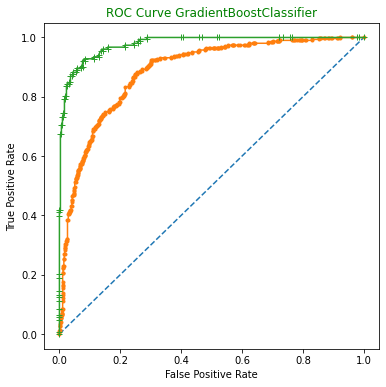

In [160]:
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr_gbcl_train, tpr_gbcl_train, marker = '.');
plt.plot(fpr_gbcl_test, tpr_gbcl_test, marker = '+');
plt.title('ROC Curve GradientBoostClassifier', color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [121]:
predictors=list(x_train)

In [122]:
feat_imp = pd.Series(gbcl.feature_importances_, predictors).sort_values(ascending=False)

Text(0, 0.5, 'Feature Importance Score')

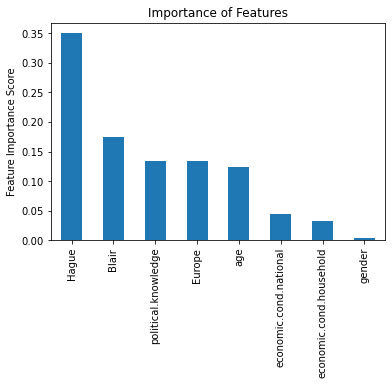

In [123]:
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [2]:
###########    Question 2

In [3]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [4]:
len(inaugural.fileids())

58

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [6]:
sp1 = inaugural.raw('1941-Roosevelt.txt')

In [38]:
sp1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [39]:
# Numbers of characters used

print(len(sp1))

7571


In [9]:
# Number of sentences used

sentence1 = sent_tokenize(sp1)
print(len(sentence1))

68


In [10]:
# Number of words used

words1 = word_tokenize(sp1)
print(len(words1))

1526


In [11]:
stopWords = nltk.corpus.stopwords.words('english') + list(string.punctuation)

In [12]:
stopWords.append('--')
stopWords.append("'s")
stopWords.append('``')
stopWords.append('...')
stopWords.append("''")
stopWords.append('...')

In [13]:
all_words1 = (w.lower() for w in words1)

In [14]:
all_words_clean1 = [word for word in all_words1 if word not in stopWords]

In [15]:
all_words_clean1

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three-score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained'

In [16]:
# Number of clean words after stopwords removal

print(len(all_words_clean1))

625


In [14]:
all_words_freq1 = nltk.FreqDist(all_words_clean1)
all_words_freq1.most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

In [15]:
words1 = ' '.join(all_words_clean1)
words1

In [16]:
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(words1)

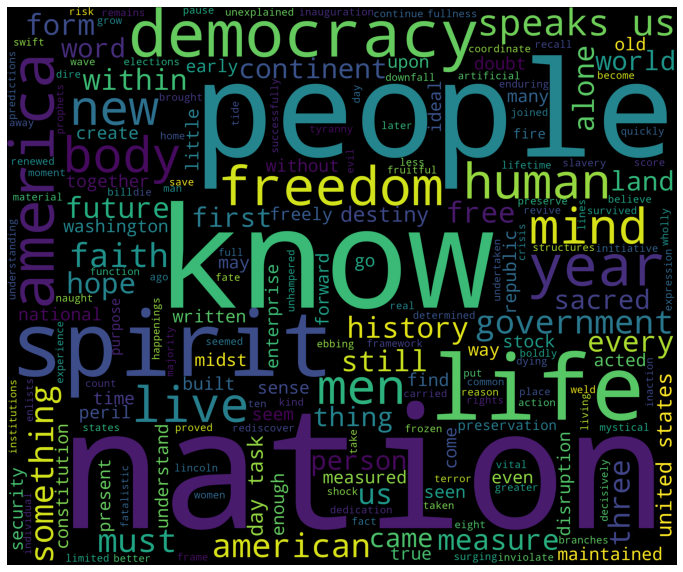

In [17]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [18]:
sp2 = inaugural.raw('1961-Kennedy.txt')

In [40]:
sp2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [41]:
# Numbers of characters used

print(len(sp2))

7618


In [20]:
# Number of sentences used

sentence2 = sent_tokenize(sp2)
print(len(sentence2))

52


In [21]:
# Number of words used

words2 = word_tokenize(sp2)
print(len(words2))

1543


In [22]:
all_words2 = (w.lower() for w in words2)

In [23]:
all_words_clean2 = [word for word in all_words2 if word not in stopWords]

In [25]:
all_words_clean2

['vice',
 'president',
 'johnson',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alik

In [26]:
# Number of clean words after stopwords removal

print(len(all_words_clean2))

689


In [39]:
all_words_freq2 = nltk.FreqDist(all_words_clean2)
all_words_freq2.most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

In [42]:
words2 = ' '.join(all_words_clean2)

In [26]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(words2)

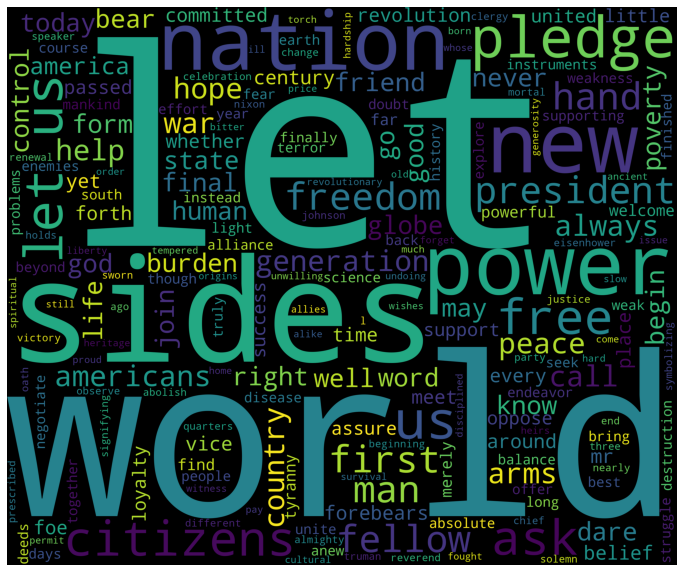

In [27]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [27]:
sp3 = inaugural.raw('1973-Nixon.txt')

In [42]:
sp3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [43]:
# Numbers of characters used

print(len(sp3))

9991


In [29]:
# Number of sentences used

sentence3 = sent_tokenize(sp3)
print(len(sentence3))

68


In [30]:
# Number of words used

words3 = word_tokenize(sp3)
print(len(words3))

2006


In [31]:
all_words3 = (w.lower() for w in words3)

In [32]:
all_words_clean3 = [word for word in all_words3 if word not in stopWords]

In [33]:
all_words_clean3

['mr.',
 'vice',
 'president',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs.',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far-reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


In [34]:
# Number of clean words after stopwords removal

print(len(all_words_clean3))

832


In [35]:
all_words_freq3 = nltk.FreqDist(all_words_clean3)
all_words_freq3.most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

In [36]:
words3 = ' '.join(all_words_clean3)

In [37]:
wordcloud3 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(words3)

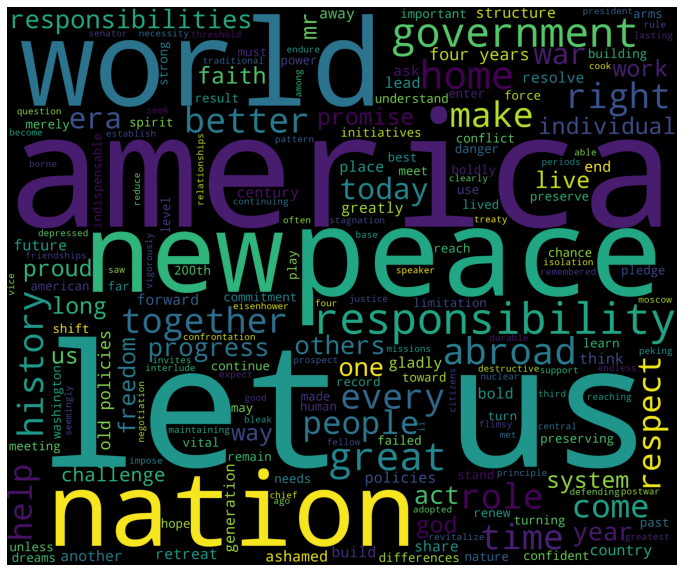

In [37]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show()

In [ ]:
####### END